# Mutual Information Neural Diffusion Estimator

In [1]:
import torch
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
# Use Kraskov-Stogbauer-Grassberger MI estimator to run example tests.
!pip install wandb
!pip install -e ../..

Obtaining file:///home/foresti/mutinfo-minde
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mutinfo (pyproject.toml) ... done
  Created wheel for mutinfo: filename=mutinfo-2025.2.1-py3-none-any.whl size=26476 sha256=4ca84c96c82f8a97488c84d27ce2a6be1f0bf5a0586842792195407fe52a07e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-qwhjhpy5/wheels/f5/02/74/9f743a74b500708174e99226490fbe8adacaf329d14a807f0a
Successfully built mutinfo
  Attempting uninstall: mutinfo
    Found existing installation: mutinfo 2025.2.1
    Uninstalling mutinfo-2025.2.1:
      Successfully uninstalled mutinfo-2025.2.1


In [4]:
from mutinfo.estimators.parametric.minde import MINDE

estimator = MINDE(device="cuda:0", variant="c", n_train_steps=1000, use_ema=False)

In [5]:
from utils.plots import *
from utils.tests import *

In [6]:
font = {'size' : 16}
matplotlib.rc('font', **font)

In [7]:
from mutinfo.distributions.base import CorrelatedNormal

In [8]:
import numpy as np

MI_grid = np.linspace(0.0, 11.0, 10)
n_samples = 10000
n_runs = 1

dim = 10

## Correlated normal distribution

In [9]:
estimated_MI = run_tests(
    lambda mutual_information : CorrelatedNormal(mutual_information, dim),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|██████████| 10/10 [01:19<00:00,  7.98s/it]


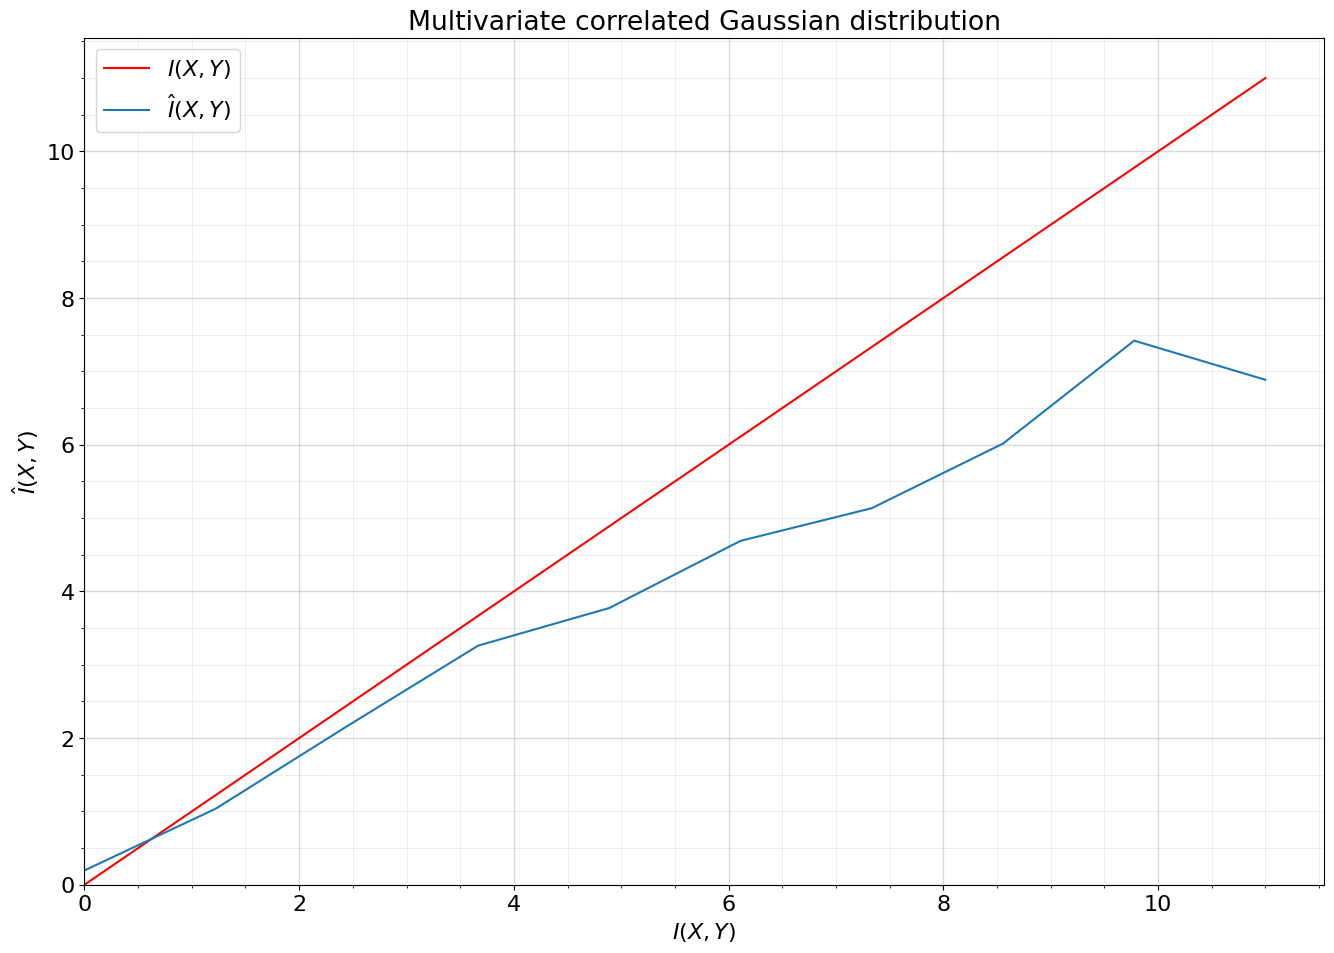

In [10]:
plot_estimated_MI(MI_grid, estimated_MI, "Multivariate correlated Gaussian distribution")

In [11]:
estimated_MI

array([[0.19430216, 0.        ],
       [1.03647646, 0.        ],
       [2.15978624, 0.        ],
       [3.26001477, 0.        ],
       [3.77347917, 0.        ],
       [4.68909451, 0.        ],
       [5.13444736, 0.        ],
       [6.01526084, 0.        ],
       [7.41916636, 0.        ],
       [6.88524468, 0.        ]])